In [119]:
# import specdist as pi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.interpolate import interp1d
from matplotlib.pyplot import cm
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.collections import LineCollection
from matplotlib.ticker import LogLocator
import re
# scientific_notation = pi.scientific_notation
from uncertainties import ufloat
from uncertainties.umath import *

import warnings; warnings.simplefilter('ignore')

# path_to_figures = '/Users/boris/Work/CLASS-SZ/SO-SZ/figures/'


label_y_firas = r'$y_\mathrm{COBE}=1.5\times 10^{-5}$'
label_mu_firas = r'$\mu_\mathrm{COBE}=9\times 10^{-5}$'

label_xe = 'Free Electron Fraction, '+r'$X_\mathrm{e}$'
label_redshift = 'Redshift, '+r'$z$'
label_mu_dist =  'Chemical Potential, '+r'$\mu$'
label_injection_frequency = "Scaled Injection Frequency, "+ r'$x_{\mathrm{inj,0}}$'
label_scaled_frequency = "Scaled Frequency, "+ r'$x=h\nu/k_{_\mathrm{B}}T_{_\mathrm{CMB}}$'
label_intensity = "Intensity, "+r'$\Delta I_x \quad [\mathrm{Jy/sr}]$'
label_bias = "Mass Bias "+r'$b$'

In [155]:
b_snr_9 = ufloat("0.2891+/-0.0521")
b_snr_6_resolved = ufloat("0.621+/-0.233")
b_snr_6 = ufloat("0.2533+/-0.0502")
b_snr_12 = ufloat("0.3167+/-0.0578")
b_snr_20 = ufloat("0.3404+/-0.0614")
b_snr_3 = ufloat("0.0682+/-0.0548")
# b_total_rotti = ufloat("0.464+/-0.207")
# b_total_rotti = ufloat("0.39+/-0.065")
b_total_rotti = ufloat("0.41+/-0.06") # From runs by Boris.

b_snr_6_1h = ufloat("0.13+/-0.05")
b_snr_6_1h2h = ufloat("0.15+/-0.04")


# this is a summary
#b_total_planck15_B19 = #ufloat("0.58+/-0.06")
#b_total_planck15_B19 = #1. - b_total_planck15_B19
b_total_planck15_B19 = ufloat("0.40+/-0.05")
planck15_cnc = ufloat("0.42+/-0.04")


b_total_planck18 = ufloat("0.409+/-0.160")

B_eiichiro = ufloat("1.27+/-0.045")
b_eiichiro = 1.-1./B_eiichiro

b_zc = ufloat("0.71+/-0.10")
b_zc = 1.- b_zc

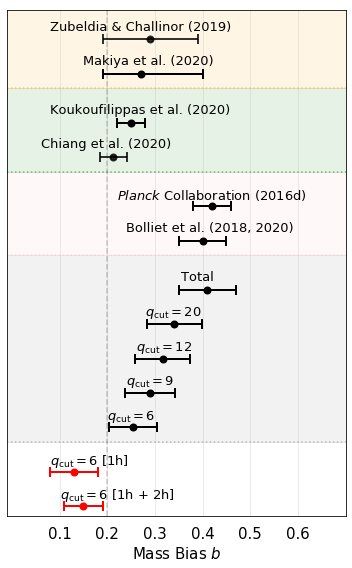

In [162]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, ax = plt.subplots(1,1,figsize=(5,8))
label_size = 15
title_size = 15
legend_size = 25
handle_length = 1.5



ymin= 0.5
ymax = 8.5
x_min = -0.01
x_max = 0.7
ax.set_xlim(x_min,x_max)

ax.set_xscale('linear')
ax.set_yscale('linear')


ax.set_xlabel(label_bias,size=title_size)
# ax.set_ylabel(None,size=title_size)
#ax.yaxis.set_label_coords(-.11,0.5)


# ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
# ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
# for label in ax.yaxis.get_ticklabels()[::2]:
#     label.set_visible(True) #(3)

#ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
#ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=0,labelsize=label_size,pad=10)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,
    right=False,
    left=False,
    labelbottom=False) 
# manipulate x-axis ticks and labels
# ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
# ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.yaxis.get_ticklabels()[::1]:
    label.set_visible(False) #(3)

#ax.grid(which="both", alpha=0.3, linestyle='--')
i = 0

#ax.text(0.48, 1.5, 'Resolved (RC)', 
#        fontsize=13, 
#        verticalalignment='top',
#        bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

ddy=0.4 ;
# Weak lensing
ystart=10. ; dy=0.7 ;  yend=ystart-dy-ddy-0.3-1.7
ax.axhspan(yend,ystart,color='orange',alpha=0.1)
ax.axhline(yend,color='orange',alpha=0.5,ls=':')

ystart=ystart-1.7
ax.text(0.08, ystart, 'Zubeldia & Challinor (2019)', 
        fontsize=13, 
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))
ax.errorbar(b_zc.nominal_value,ystart-ddy,xerr = b_zc.std_dev,c='k',marker="o",
            capsize=5,elinewidth=2,markeredgewidth=2,alpha=0.8)

ax.text(0.15, ystart-dy, 'Makiya et al. (2020)', 
        fontsize=13, 
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))
ax.errorbar(1.-0.73,ystart-dy-ddy,xerr = np.array([[0.08,0.13]]).T,c='k',marker="o",
            capsize=5,elinewidth=2,markeredgewidth=2)

# ax.text(0.5, yend+0.3, r'SZ + Weak lensing', 
#         fontsize=10, 
#         rotation=0,
#         verticalalignment='top',
#         bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))
#----------------------------------------------------------------

# Galaxy cross correlation
ystart=yend ; dy=0.7 ; yend=ystart-dy-ddy-0.3-0.3
ax.axhspan(yend,ystart,color='green',alpha=0.1)
ax.axhline(yend,color='green',alpha=0.5,ls=':')

ystart=ystart-0.3
#6.5,6.1
ax.text(0.08, ystart, 'Koukoufilippas et al. (2020)', 
        fontsize=13, 
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))
ax.errorbar(1.-0.75,ystart-ddy,xerr = 0.03,c='k',marker="o",
            capsize=5,elinewidth=2,markeredgewidth=2)

# 5.8,5.4
ax.text(0.06, ystart-dy, 'Chiang et al. (2020)', 
        fontsize=13, 
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))
ax.errorbar(b_eiichiro.nominal_value,ystart-dy-ddy,xerr = b_eiichiro.std_dev,c='k',alpha=0.8,marker="o",
            capsize=5,elinewidth=2,markeredgewidth=2)

#----------------------------------------------------------------

# Planck
ystart=yend ; dy=0.7  ; yend=ystart-dy-ddy-0.3-0.3
ax.axhspan(yend,ystart,color='pink',alpha=0.1)
ax.axhline(yend,color='pink',alpha=0.5,ls=':')

ystart=ystart-0.3
ax.text(0.22, ystart, '${\it Planck}$ Collaboration (2016d)', 
        fontsize=13, 
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))
ax.errorbar(planck15_cnc.nominal_value,ystart-ddy,xerr = planck15_cnc.std_dev,c='k',marker="o",
            capsize=5,elinewidth=2,markeredgewidth=2)

ax.text(0.24, ystart-dy, 'Bolliet et al. (2018, 2020)', 
        fontsize=13, 
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))
ax.errorbar(b_total_planck15_B19.nominal_value,ystart-dy-ddy,xerr = b_total_planck15_B19.std_dev,c='k',marker="o",
            capsize=5,elinewidth=2,markeredgewidth=2)

# ax.text(0.58, yend+0.4, r'${\it Planck}$', 
#         fontsize=12, 
#         rotation=0,
#         verticalalignment='top',
#         bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))
#----------------------------------------------------------------

# F scaling
ystart=yend ; dy=0.7 ; yend=ystart- 4*dy - ddy -0.3-0.3
ax.axhspan(yend,ystart,color='grey',alpha=0.1)
ax.axhline(yend,color='grey',alpha=0.5,ls=':')
ystart=ystart-0.3

ax.text(0.355, ystart, 'Total', 
        fontsize=13, 
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))
ax.errorbar(b_total_rotti.nominal_value,ystart-ddy,xerr = b_total_rotti.std_dev,c='k',marker="o",
            capsize=5,elinewidth=2,markeredgewidth=2)

#3.4,3
ax.text(0.28, ystart - dy, r'$q_\mathrm{cut}=20$', 
        fontsize=13, 
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))
ax.errorbar(b_snr_20.nominal_value,ystart - dy - ddy,xerr = b_snr_12.std_dev,c='k',marker="o",
            capsize=5,elinewidth=2,markeredgewidth=2)

# 2.7,2.3
ax.text(0.26, ystart - 2*dy, r'$q_\mathrm{cut}=12$', 
        fontsize=13, 
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))
ax.errorbar(b_snr_12.nominal_value,ystart - 2.*dy - ddy,xerr = b_snr_12.std_dev,c='k',marker="o",
            capsize=5,elinewidth=2,markeredgewidth=2)

# 2, 1.6
ax.text(0.24, ystart - 3.*dy, r'$q_\mathrm{cut}=9$', 
        fontsize=13, 
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))
ax.errorbar(b_snr_9.nominal_value,ystart - 3.*dy - ddy,xerr = b_snr_9.std_dev,c='k',marker="o",
            capsize=5,elinewidth=2,markeredgewidth=2)

#1.2,0.8
ax.text(0.2, ystart - 4.*dy, r'$q_\mathrm{cut}=6$', 
        fontsize=13, 
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))
ax.errorbar(b_snr_6.nominal_value,ystart - 4*dy - ddy,xerr = b_snr_6.std_dev,c='k',marker="o",
            capsize=5,elinewidth=2,markeredgewidth=2)

# ax.text(0.55, yend+0.4, r'$F_{\rm SZ}$ scaling', 
#         fontsize=12, 
#         rotation=0,
#         verticalalignment='top',
#         bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))
#----------------------------------------------------------------

# Full MCMC
ystart=yend ; dy=0.7 ; yend=ystart- dy - ddy -0.2-0.3

ystart=ystart-0.2

#0.5,0.08
ax.text(0.08, ystart, r'$q_\mathrm{cut}=6$ [1h]', 
        fontsize=13, 
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))
ax.errorbar(b_snr_6_1h.nominal_value,ystart-ddy,xerr = b_snr_6_1h.std_dev,c='r',marker="o",
            capsize=5,elinewidth=2,markeredgewidth=2)

# -0.1,-0.5
ax.text(0.1, ystart-dy, r'$q_\mathrm{cut}=6$ [1h + 2h]', 
        fontsize=13, 
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))
ax.errorbar(b_snr_6_1h2h.nominal_value,ystart-dy-ddy,xerr = b_snr_6_1h2h.std_dev,c='r',marker="o",
            capsize=5,elinewidth=2,markeredgewidth=2)
# ax.text(0.55, yend+0.4, 'Full MCMC', 
#         fontsize=12, 
#         rotation=0,
#         verticalalignment='top',
#         bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))
#----------------------------------------------------------------


ax.xaxis.grid(alpha=0.3)
plt.xticks([0.1,0.2,0.3,0.4,0.5,0.6])

# ax.axvspan(0.22-0.12, 0.22+0.12, color='blue',alpha=0.05)
ax.axvline(0.2,linestyle="dashed",alpha=0.2,c="k")

# ax.text(0.07, .25, '\n'.join((r'P18 cosmology','    $q_\mathrm{cut}=6$')), 
#         fontsize=13, 
#         verticalalignment='top',
#         bbox=dict(boxstyle='round', facecolor='grey', alpha=0.))

# eb = ax.errorbar(0.16,0.5,xerr = 0.02,c='grey',
#             capsize=5,elinewidth=2,markeredgewidth=2,alpha=0.8)
# eb[-1][0].set_linestyle('--')



ax.set_ylim(-1.8,ymax)


fig.tight_layout()
plt.savefig("../../results/yy_spec/" + '/figures_for_paper_bias_measurements_final.pdf')
plt.show()
# plt.close(fig)